# Importing packages 

In [ ]:
import numpy as np
import random
import scipy.stats
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits import mplot3d
## %matplotlib widget

## from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# Finding $ \lambda_k $ and Generating Synthetic data

## For loop for $ \lambda_k $ and $ \Delta N_k $

Generating a synthetic data using a **FOR-LOOP** using the following iteration

$ \lambda_0 = \mu  $       
   then $ \Delta N_0 \thicksim Poi(\lambda_0) $

$ \lambda_1 = \mu + \alpha \Delta N_0  $     
   then $ \Delta N_1 \thicksim Poi(\lambda_1) $

$ \lambda_2 = \mu + \gamma \alpha \Delta N_0 + \alpha \Delta N_1  $    
   then $ \Delta N_2 \thicksim Poi(\lambda_2) $
   
$ \lambda_3 = \mu + \gamma^2 \alpha \Delta N_0 + \gamma \alpha \Delta N_1 + \alpha \Delta N_2 $    
   then $ \Delta N_3 \thicksim Poi(\lambda_3) $


***Note: The loop doesn't work for $ \mu > \lambda $ which makes sense as we are not taking anything away in the function.***


$ \lambda_0 = \mu  \ \ \rightarrow \ \ \Delta N_0 \sim Poi(\lambda_0) $

$ \lambda_1 =  \gamma (\lambda_0 -\mu )+  \mu + \alpha \Delta N_0   \ \ \rightarrow \ \ \Delta N_1 \sim Poi(\lambda_1) $

$ \lambda_2 =  \gamma (\lambda_1 -\mu )+  \mu + \alpha \Delta N_1   \ \ \rightarrow \ \ \Delta N_2 \sim Poi(\lambda_2) $

$\cdots $

# Function to Generate data



In [ ]:
def create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):

    # fixing the randomness
    np.random.seed(rnd_seed)

    # First lambda(0) = mu
    lambda_ = mu

    # Delta_n and lambda_n empty lists
    Delta_n = [] ## adding a dummy data point
    
    Lambda_ = [mu]  ## adding the first lambda_k = mu

    #Generating the lambda function and synthetic data

    for i in range(0,n):

        # draw from poisson distribution
        delta_n = np.random.poisson(lambda_, size=1)

        # creating a list of the delta_n values
        Delta_n.append(delta_n)

        # update lambda k+1
        lambda_ = gamma*(lambda_ - mu) + mu + alpha*delta_n

        # creating a list of lambda_k values
        Lambda_.append(lambda_)


    # Turn the lists into arrays\vectors
    Delta_n = np.asarray(Delta_n)
    Lambda_ = np.asarray(Lambda_)

    #Delta_n = np.vstack(Delta_n)
    Lambda_ = np.vstack(Lambda_)
    
    return Lambda_, Delta_n

## Testing the function and plotting the data 

In [ ]:
# create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):

n = 5
rnd_seed = 4 
mu = 9 # larger mu
gamma = 0.2
alpha = 0.8

Lambda_, Delta_n = create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)

print(Delta_n) 
print(" ")
print(Lambda_)
#Delta_n.size

[[ 8]
 [15]
 [18]
 [27]
 [32]]
 
[[ 9.     ]
 [15.4    ]
 [22.28   ]
 [26.056  ]
 [34.0112 ]
 [39.60224]]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):

n = 10
rnd_seed = 4
mu = 1
gamma = 0.1
alpha = 0.5

Lambda_, Delta_n = create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)

print(Delta_n) 
print(" ")
print(Lambda_)
#Delta_n.size

[[4]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [5]
 [2]
 [4]]
 
[[1.        ]
 [3.        ]
 [2.2       ]
 [1.62      ]
 [1.562     ]
 [2.0562    ]
 [1.60562   ]
 [1.560562  ]
 [3.5560562 ]
 [2.25560562]
 [3.12556056]]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


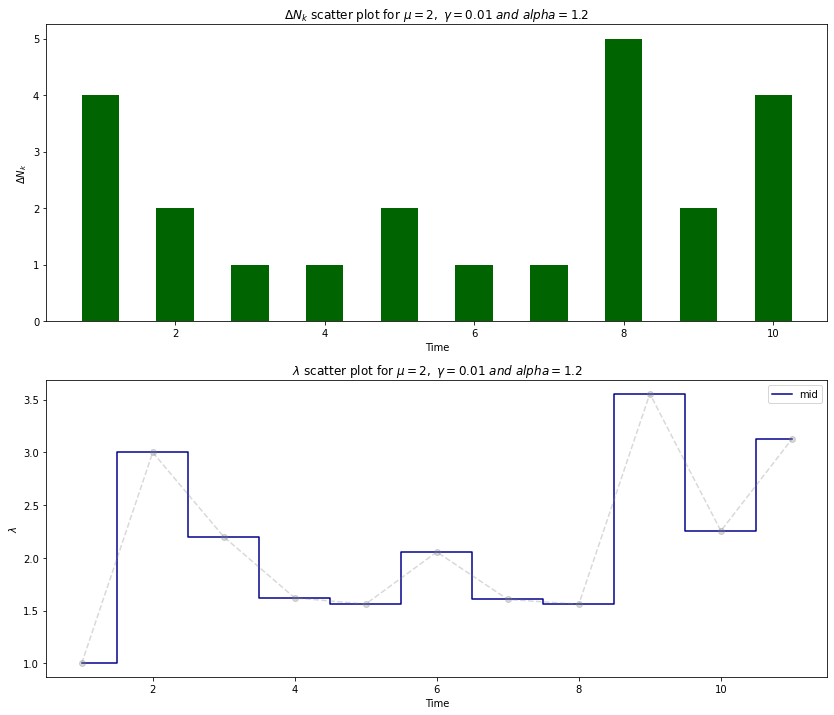

In [ ]:
Delta_n = np.squeeze(Delta_n, axis=1) ## squeezing the data into a n x1 vector

plt.figure( figsize = (14,12))

# subplot 1
plt.subplot(211)

x1 = range(1,n+1)

plt.bar(x1, Delta_n[0:] ,  width=0.5,  color = 'darkgreen')

plt.title('$\Delta N_k $ scatter plot for $ \mu = 2 , \ \gamma = 0.01 \ and \ alpha = 1.2  $')
plt.xlabel('Time')
plt.ylabel('$ \Delta N_k$');
;

# subplot 2
plt.subplot(212)

# Step function 
x2 = range(1,n+2)

plt.step(x2, Lambda_, color='darkblue', where='mid' , label = 'mid')  # label='pre (default)')
plt.plot(x2, Lambda_, 'o--', color='grey', alpha=0.3)

plt.title('$\lambda $ scatter plot for $ \mu = 2 , \ \gamma = 0.01 \ and \ alpha = 1.2  $')
plt.xlabel('Time')
plt.legend()
plt.ylabel('$ \lambda$');

## Data outputs given different gamma and alpha values

In [ ]:
# same gamma different alpha 

## Choice 1
gamma_1 = 0.01
alpha_1 = 0.9

Lambda_, Delta_n = create_synthetic_data_for_loop(10, 4, 2, gamma_1, alpha_1)
data_small_gamma = Delta_n

# Choice 2
gamma_2 = 0.01
alpha_2 = 0.2

Lambda_, Delta_n = create_synthetic_data_for_loop(10, 4, 2, gamma_2, alpha_2)
data_larger_gamma = Delta_n

# Difference
data_larger_gamma - data_small_gamma

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[  0],
       [ -2],
       [ -4],
       [ -5],
       [ -8],
       [ -9],
       [ -5],
       [ -9],
       [-12],
       [-10]])

In [ ]:
### Same alpha (small), larger gamma 

#Choice 1
gamma_1 = 0.7
alpha_1 = 0.1

Lambda_, Delta_n = create_synthetic_data_for_loop(10, 4, 2, gamma_1, alpha_1)
data_small_gamma_large_alpha = Delta_n


## Choice 2
gamma_2 = 0.2
alpha_2 = 0.1

Lambda_, Delta_n = create_synthetic_data_for_loop(10, 4, 2, gamma_2, alpha_2)
data_larger_gamma_smaller_alpha = Delta_n

# Difference
data_small_gamma_large_alpha - data_larger_gamma_smaller_alpha

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[ 0],
       [ 0],
       [ 1],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [-1]])

There is a large difference in the way the data looks like given : *small gamma and large alpha* **vs** *larger gamma with smaller alpha.*

But how small is 'small' for gamma and how large is 'large' for alpha? 

# Using Synthetic data to find Negative Log-likelihood

$ ln(L) \ = \ \sum_{k=1}^N \Delta N_k ln(\lambda_k) - \sum_{k=1}^N \lambda_k - \sum_{k=1}^N ln( \Delta N_k ! ) $

$ -Log ( L(\theta) ) =  - \sum^N_{k=1} \Delta N_k ln(\lambda_k) + \sum^N_{k=1} \lambda_k + \sum_{k=1}^N ln( \Delta N_k ! ) $

Here we have to use both the $ \Delta N_k $ and $\lambda $ that we created to find the -LL.

Our function ``` create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)```

creates the arrays ```Delta_n``` and ```Lambda_k```

3D plot: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [ ]:
# Plotting data for different values of alpha
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.1)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.3)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.5)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.8)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.9)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


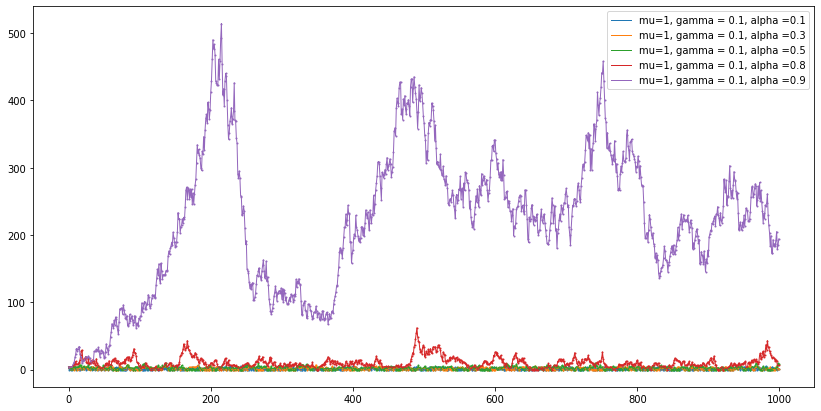

In [ ]:
# Looking at different values of alpha

fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.1")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.3")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.5")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.8")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.9")

plt.legend();

In [ ]:
# Plotting data for different values of gamma
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.5)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.2, alpha =0.5)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.3, alpha =0.5)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.4, alpha =0.5)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.5, alpha =0.5) # lambda is too large for anything beyond gamma=0.5

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


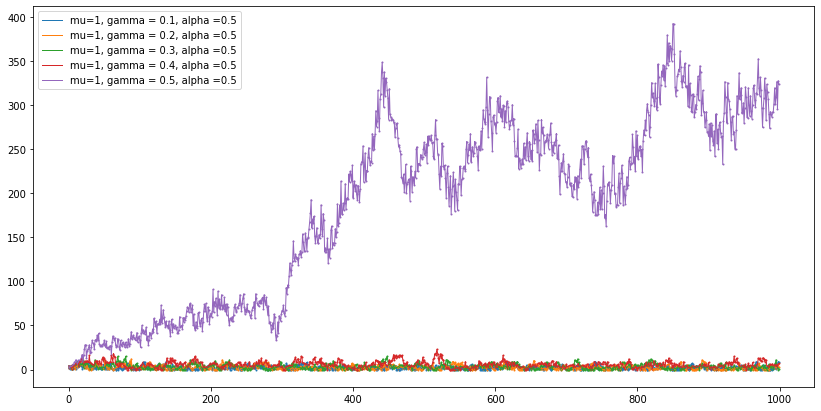

In [ ]:
fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.5")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.2, alpha =0.5")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.3, alpha =0.5")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.4, alpha =0.5")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.5, alpha =0.5")

plt.legend();

In [ ]:
# Plotting data for different values of gamma
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.6)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.2, alpha =0.6)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.3, alpha =0.6)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.4, alpha =0.6)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.41, alpha =0.6) # lambda gets too large for values beyond 0.45

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


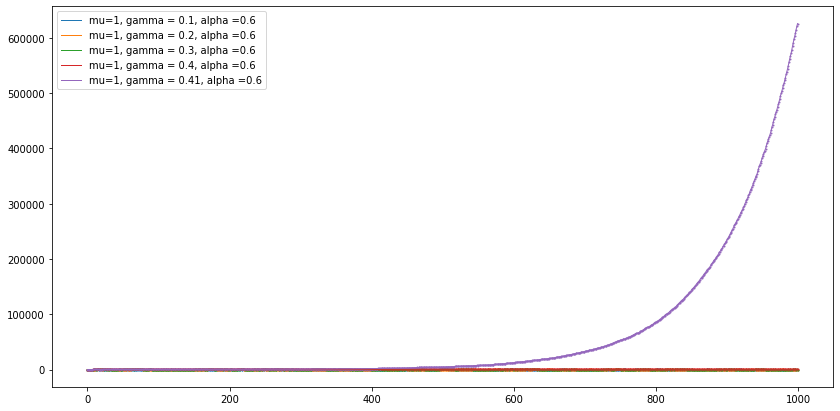

In [ ]:
fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.6")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.2, alpha =0.6")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.3, alpha =0.6")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.4, alpha =0.6")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.41, alpha =0.6")

plt.legend();

## Generating 100 data points for the negative log-likelihood 

Remember ```create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha )``` which returns two arrays with data:

``` Delta_n ```
``` Lambda_ ```

Once we have the two arrays we can use the Delta_n one (the data) to constuct the negative- log -likelihood

In [ ]:
## Generating Data 

n = 100  ## samples
rnd_seed = 4
mu = 1
gamma = 0.1
alpha = 0.5

Lambda_, Delta_n = create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)

data = np.squeeze(Delta_n, axis=1) ## data

data.size

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


100

## 3D Scatter and Negative Log-Likelihood generation

In [ ]:
mu = np.linspace(0.1, 2, 10)  ## any number
alpha = np.linspace(0.1, 1, 10) # infection rate larger than 0
gamma = np.linspace(0.1, 0.9, 10)  # decay rate between 0 and 1


mm, aa, gg = np.meshgrid(mu, alpha, gamma)

In [ ]:
lambda1 = mm ## baseline

lambda2 = np.multiply((lambda1 - mm),gg) + mm + aa*data[0]

## making an array for the lambdas 

l = mm.copy()

lambda_est = l - l

In [ ]:
lambda_est ## empty array 

n = len(data)

l_list = [mm]

for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data[i]
    
    l_list.append(lambda_est)
    
#l_list[0]
#len(l_list) ## 100 values in list 

In [ ]:
## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data[i], l_list[i])
    
    ll_list.append(vals)
    
##ll_list
    

In [ ]:
neg_log_like =  - sum(ll_list) + sum(l_list)

len(neg_log_like)

10

In [ ]:
neg_log_like.shape

(10, 10, 10)

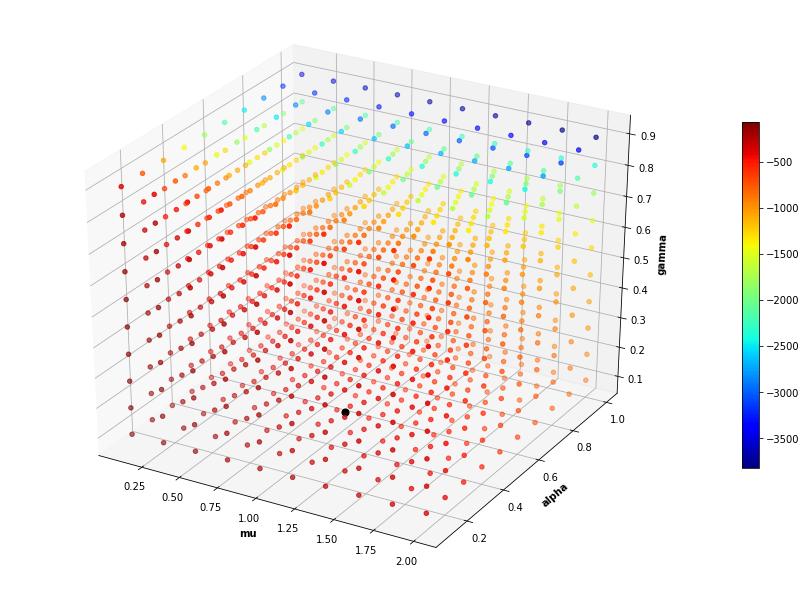

In [ ]:
fig = pyplot.figure(figsize=(12,8))

ax = Axes3D(fig)

# mu = 1 gamma = 0.1 alpha = 0.5

AX = ax.scatter(mm, aa, gg, c= neg_log_like, cmap='jet')
ax.scatter(mu, alpha, gamma, s=50, c="black")

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

plt.colorbar(AX, ax = ax, shrink = 0.6)

pyplot.show()

## 3D scatter for 1000 points negative log- likelihood 

In [ ]:
## Generating Data 

n = 1000  ## samples
rnd_seed = 4
mu = 1
gamma = 0.1
alpha = 0.5

Lambda_, Delta_n = create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)

data1000 = np.squeeze(Delta_n, axis=1) ## data

data1000.size

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


1000

In [ ]:
mu = np.linspace(0.1, 2, 25)  ## any number
alpha = np.linspace(0.1, 1, 25) # infection rate larger than 0
gamma = np.linspace(0.1, 0.9, 25)  # decay rate between 0 and 1

mm, aa, gg = np.meshgrid(mu, alpha, gamma)

## ------------

## making an array for the lambdas 

l = mm.copy()

lambda_est = l - l

#lambda_est.shape ## shape = (10, 10, 10)

## ------------

##lambda1 = mm  ## baseline

n = len(data1000)

l_list = [mm]  ## list for the element wise multiplication of the data points with each lambda estimate

## the first multipication of the negative log-likelihood
for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data1000[i]
    
    l_list.append(lambda_est)
    
## -----------

## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data1000[i], l_list[i])
    
    ll_list.append(vals)
    
## ------------------

## finding the negative log-likelihood function 
## by summing all 10 x 10 x 10 arrays for each multiplication and summing all 10x10x10 arrays of just lambdas  

neg_log_like =  -sum(ll_list) + sum(l_list)

neg_log_like.shape

(25, 25, 25)

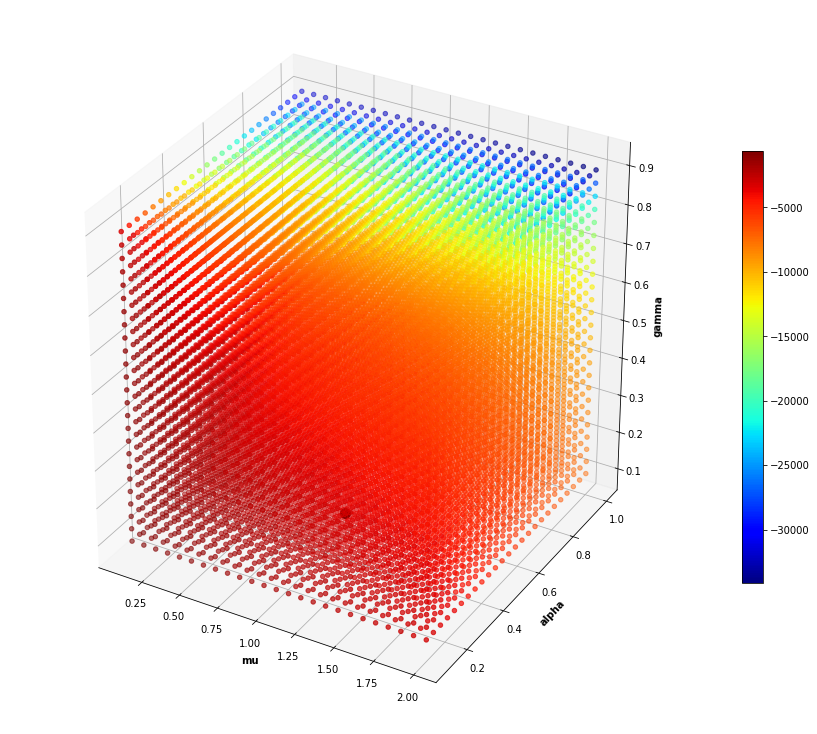

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(1,0.5,0.1, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
#ax.azim = 200
#ax.elev = -45
plt.show()

## fig.savefig('3dScatter_neg_ll_10_10.png', transparent=True,  edgecolor='none')

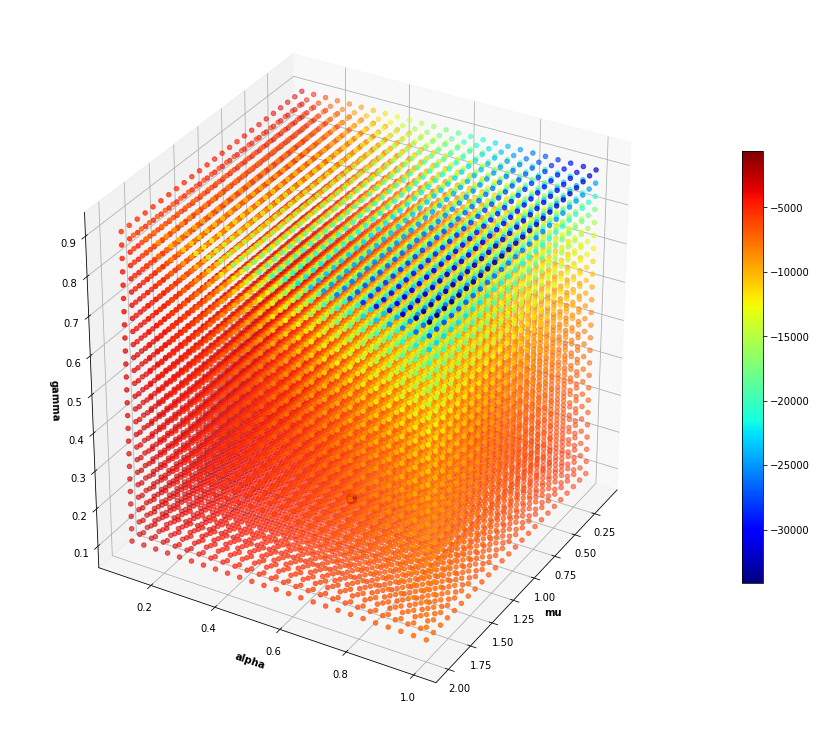

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(1,0.5,0.1, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45
plt.show()

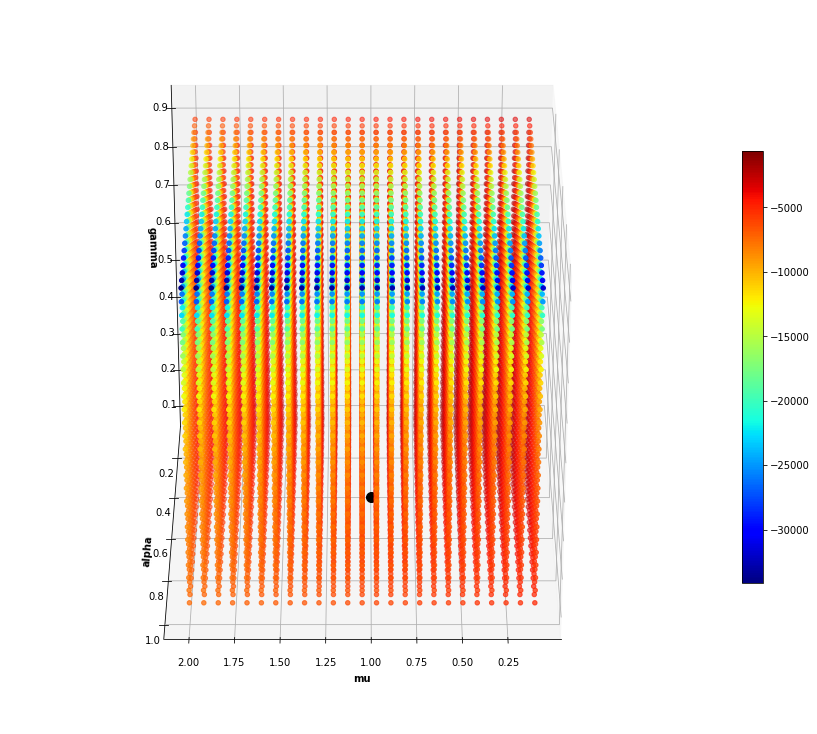

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(1,0.5,0.1, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 90
#ax.elev = -45
plt.show()

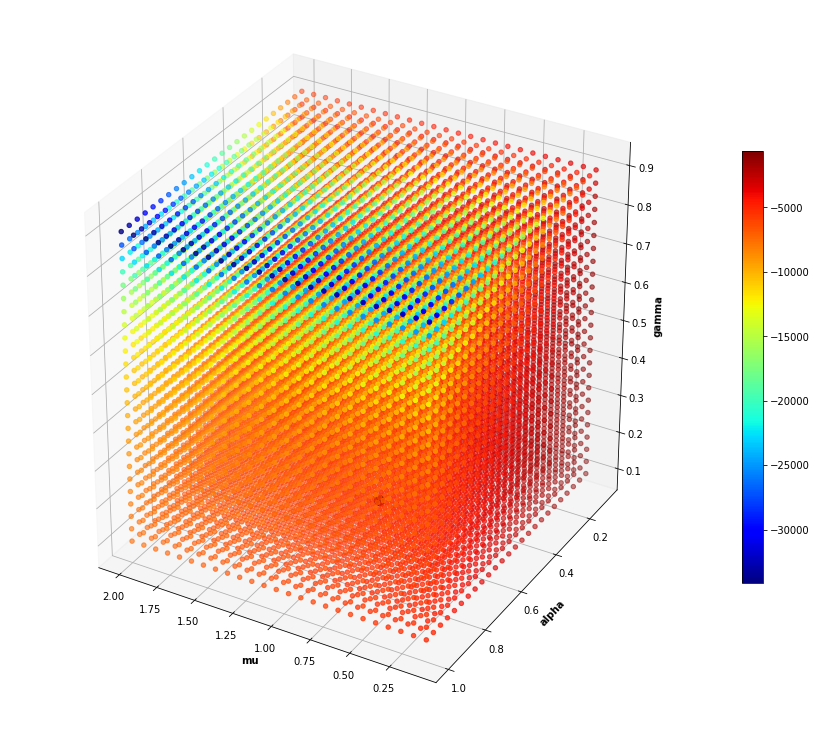

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(1,0.5,0.1, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 120
#ax.elev = -45
plt.show()

# Finding the mu, alpha and gamma values

Surrogate function

$ Q(\theta |\theta^n ) = -\sum^N_{k=1} ln(\lambda_k ) \Delta N_k  +N\mu +\frac{1}{2}[ \frac{\alpha^n }{1+\gamma^n}(1+\gamma)^2 + \frac{(1+\gamma)^n}{\alpha^n}\alpha^2 ] \ (\sum^{N-2}_{i=1} \Delta N_i ) + \alpha \Delta N_{N-1} $

---

Using the MM method we made a surrogate function, which we differentiate to get:

We set * $ \phi^n_{kl} = \alpha \gamma^{k-l-1} \Delta N_l  $


$ \mu^{n+1} = \frac{1}{N} \sum^N_{k=1} \frac{ \mu^n }{\lambda_k^n} \Delta N_k $

Let 

* $ A = \frac{ 1+\gamma^n }{\alpha^n}(\sum^{N-2}_{i=1} \Delta N_i ) $
* $ B = \Delta N_{N-1}  $
* $ C =  \sum^{N}_{k=1} \sum^{k-1}_{l=1} \frac{ \phi^n_{kl} }{ \lambda_k^n } \Delta N_k  $

$ \alpha^{n+1} = \frac{ -B + \sqrt{B^2 + 4AC} }{2A} $


Let 

* $ D =  \frac{\alpha^n (\sum^{N-2}_{i=1} \Delta N_i ) }{ (1+\gamma^n )} $ 

* $ E = \sum^{N}_{k=1} \sum^{k-1}_{l=1} (k-l-1) \frac{ \phi^n_{kl} }{ \lambda_k^n } \Delta N_k  $

So 

$ \gamma^{n+1} =  \frac{D}{E - D}$

Note that the parameters are

* $ \mu > 0  $
* $ \alpha > 0 $
* $ 0 < \gamma < 1 $
